In [5]:
import numpy as np 
import pandas as pd
import glob 
import os
import matplotlib.pyplot as plt
from scikit-learn import StandardScaler

path = 'knn-dataset'
Xfiles = glob.glob(os.path.join(path,'data*.csv'))
yfiles = glob.glob(os.path.join(path,'labels*.csv'))

X,y ={},{}

for f in Xfiles:
    X[f[12:18].replace('.','')] = pd.read_csv(f)
    
for f in yfiles:
    y[f[12:20].replace('.','')] = pd.read_csv(f).values.T[0]


In [6]:
print('length: ',len(X), len(y))

length:  10 10


In [8]:
print(X['data1'].shape, y['labels1'].shape)

(110, 64) (110,)


In [35]:
class KNN(object):
    def __init__(self,X,y):
        """init training data"""
        self.X_train = X
        self.y_train = y    
        #print(X.shape,y.shape)
        
    def dists(self, X):
        """compute distance matrix between test and train dataset"""
        dists = np.zeros((X.shape[0], self.X_train.shape[0])) 
        """
        for i in range(X.shape[0]):
            for j in range(self.X_train.shape[0]):
                dists[i,j] = np.sqrt(np.sum((X[i]-self.X_train[j])**2))
        """ 
        dists = np.sqrt(np.sum(X**2,axis =1, keepdims=True) + np.sum(self.X_train**2,axis =1, keepdims=True).T - 2*np.dot(X,self.X_train.T))
        return dists
    
    def predict_labels(self, dists, k):
        """pick the k nearest neigbour"""
        y_pred = np.zeros(dists.shape[0])
        for i in range(dists.shape[0]):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i,:],axis=0)][:k]
            #print(np.argmax(np.bincount(closest_y)))
            y_pred[i] = np.argmax(np.bincount(closest_y))
        return y_pred

In [36]:
knn = KNN(np.vstack([X['data1'],X['data3'],X['data4'],X['data5']]),np.hstack([y['labels1'],y['labels3'],y['labels4'],y['labels5']]))
dists = knn.dists(X['data2'].values)
print(dists.shape)
pred = knn.predict_labels(dists,20)
test_result = (pred == y['labels2'])
print('accuracy: ', np.sum(test_result/pred.shape[0]))

(110, 440)
accuracy:  0.8090909090909089


In [65]:
k_i = [i for i in range(1,32,2)]
k_accu = {}

# cross validate result
for k in k_i:
    accuracy = []
    for test_set in range(1,11):
        train_set = [x for x in range(1,11) if x != test_set]
        # print('Train Dataset: ', train_set,'   Test Dataset: ', test_set)
        
        X_train_set = np.vstack([X['data%s'%i] for i in train_set])
        X_test_set = X['data%s'%test_set]
        y_train_set = np.hstack([y['labels%s'%i] for i in train_set])
        y_test_set = y['labels%s'%test_set]
        # print('X shape: ', X_train_set.shape, X_test_set.shape,'   y shape: ', y_train_set.shape, y_test_set.shape)

        knn = KNN(X_train_set, y_train_set)
        dists = knn.dists(X_test_set.values)

        y_test_pred = knn.predict_labels(dists,k)
        num_correct = np.sum(y_test_pred == y_test_set)
        accuracy.append(float(num_correct) / y_test_set.shape[0])
    k_accu.setdefault(k,accuracy)

# Print out the computed accuracies
for k in k_accu:
    k_accu[k] = np.sum(k_accu[k])/10
    print('k = ',k , ' - accuracy: ', k_accu[k])

k =  1  - accuracy:  0.7436363636363635
k =  3  - accuracy:  0.7872727272727272
k =  5  - accuracy:  0.7918181818181818
k =  7  - accuracy:  0.8036363636363635
k =  9  - accuracy:  0.7936363636363637
k =  11  - accuracy:  0.8027272727272727
k =  13  - accuracy:  0.7954545454545456
k =  15  - accuracy:  0.7972727272727272
k =  17  - accuracy:  0.7972727272727272
k =  19  - accuracy:  0.8081818181818182
k =  21  - accuracy:  0.8090909090909092
k =  23  - accuracy:  0.8109090909090909
k =  25  - accuracy:  0.8081818181818182
k =  27  - accuracy:  0.808181818181818
k =  29  - accuracy:  0.8072727272727273
k =  31  - accuracy:  0.8036363636363637


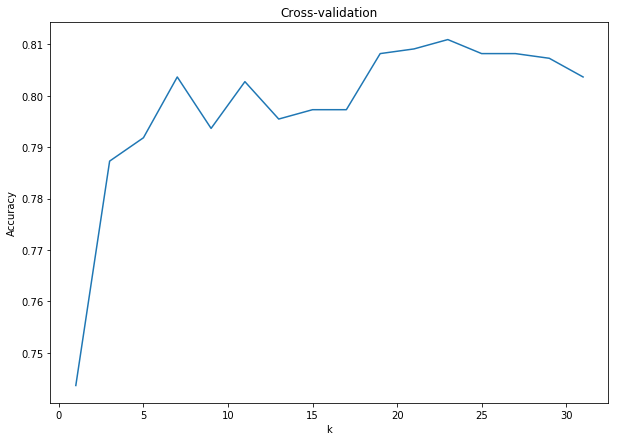

In [66]:
plt.figure(figsize=(10,7))
plt.plot(k_accu.keys(), k_accu.values())
plt.title('Cross-validation')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()